Иванов Иван Иванович: Премия: 0, Праздничная премия: 2000, Оклад после индексации: 262500.0, Общая премия: 264500.0, Налоговые отчисления: 34385.0
Сорокина Екатерина Матвеевна: Премия: 0, Праздничная премия: 2000, Оклад после индексации: 78750.0, Общая премия: 80750.0, Налоговые отчисления: 10497.5
Струков Иван Сергеевич: Премия: 4500.0, Праздничная премия: 2000, Оклад после индексации: 160500.0, Общая премия: 167000.0, Налоговые отчисления: 21710.0
Корнеева Анна Игоревна: Премия: 3600.0, Праздничная премия: 2000, Оклад после индексации: 126000.0, Общая премия: 131600.0, Налоговые отчисления: 17108.0
Старчиков Сергей Анатольевич: Премия: 1500.0, Праздничная премия: 2000, Оклад после индексации: 52500.0, Общая премия: 56000.0, Налоговые отчисления: 7280.0
Бутенко Артем Андреевич: Премия: 0, Праздничная премия: 2000, Оклад после индексации: 214000.0, Общая премия: 216000.0, Налоговые отчисления: 28080.0
Савченко Алина Сергеевна: Премия: 0, Праздничная премия: 2000, Оклад после индексации

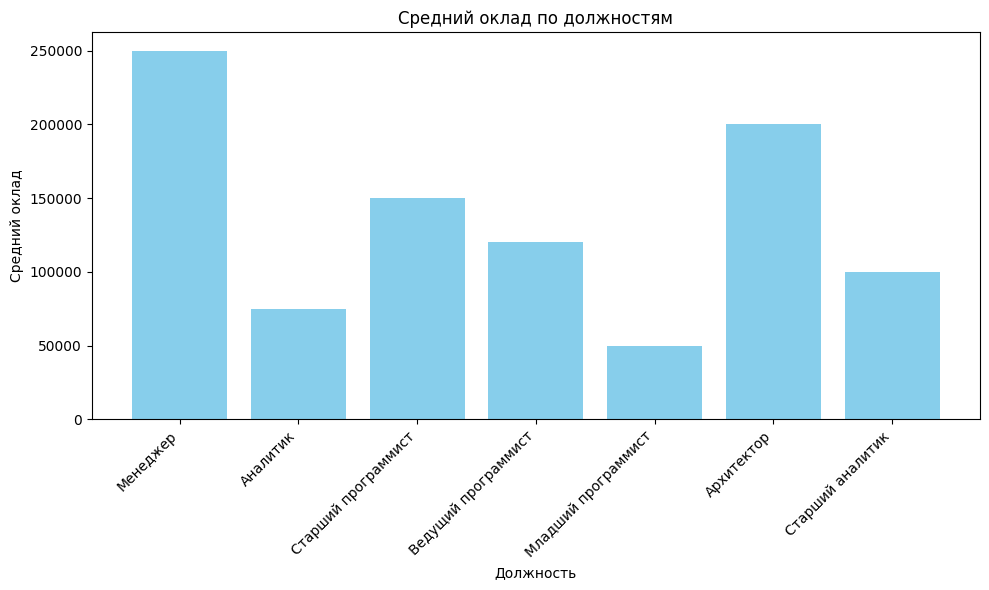

In [5]:
import csv
import json
from datetime import datetime
import matplotlib.pyplot as plt

class Employee:
    def __init__(self, last_name, first_name, middle_name, position, hire_date, salary):
        self.__last_name = last_name
        self.__first_name = first_name
        self.__middle_name = middle_name
        self.__position = position
        self.__hire_date = datetime.strptime(hire_date, "%d.%m.%Y")
        self.__salary = salary
        self.__bonus_percentage = 0.03
        self.__holiday_bonus = 2000
        self.__index_long = 0.07
        self.__index_standard = 0.05

    def get_full_name(self):
        return f"{self.__last_name} {self.__first_name} {self.__middle_name}"

    def calculate_bonus(self):
        years_of_work = (datetime.now() - self.__hire_date).days // 365
        months_of_work = (datetime.now() - self.__hire_date).days // 30

        programmer_bonus = self.__salary * self.__bonus_percentage if 'программист' in self.__position.lower() else 0
        after_index = self.__salary + self.__salary * (self.__index_long if years_of_work > 10 else self.__index_standard)
        total_bonus = programmer_bonus + self.__holiday_bonus + after_index
        tax = round(total_bonus * 0.13, 2)  # Налог 13% от общей премии

        return {
            'ФИО': self.get_full_name(),
            'Оклад': self.__salary,
            'Премия для программистов': round(programmer_bonus, 2),
            'Праздничная премия': round(self.__holiday_bonus, 2),
            'Оклад после индексации': round(after_index, 2),
            'Общая премия': round(total_bonus, 2),
            'Налоговые отчисления': tax,  # Добавлено поле налог
            'months_of_work': months_of_work
        }

def calculate_bonus():
    employees = []
    employees_6_months = []
    positions_salary = {}  # Словарь для окладов по должностям

    with open('employees.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=';')

        for row in reader:
            fio = row['ФИО'].split()  
            if len(fio) != 3:
                continue 

            last_name, first_name, middle_name = fio
            salary = int(row['Оклад'].replace(' ', ''))

            employee = Employee(
                last_name=last_name, 
                first_name=first_name,
                middle_name=middle_name,
                position=row['Должность'],
                hire_date=row['Дата принятия'],
                salary=salary
            )
            employee_data = employee.calculate_bonus()
            employees.append(employee_data)

            if employee_data['months_of_work'] > 6:
                employees_6_months.append({'ФИО': employee.get_full_name()})

            # Сбор зарплат по должностям
            position = row['Должность']
            if position in positions_salary:
                positions_salary[position].append(salary)
            else:
                positions_salary[position] = [salary]

    # Вывод информации о сотрудниках
    for employee in employees:
        print(f"{employee['ФИО']}: Премия: {employee['Премия для программистов']}, "
              f"Праздничная премия: {employee['Праздничная премия']}, "
              f"Оклад после индексации: {employee['Оклад после индексации']}, "
              f"Общая премия: {employee['Общая премия']}, "
              f"Налоговые отчисления: {employee['Налоговые отчисления']}")

    print('Сотрудники, работающие более 6 месяцев:')
    for emp in employees_6_months:
        print(f"{emp['ФИО']}")

    # Построение диаграммы из окладов по должностям
    plot_salaries_by_position(positions_salary)

    with open('output.csv', 'w', newline='', encoding='utf-8') as output_csv:
        fields = ['ФИО', 'Оклад', 'Премия для программистов', 'Праздничная премия', 'Оклад после индексации', 'Общая премия', 'Налоговые отчисления']
        output_writer = csv.DictWriter(output_csv, fieldnames=fields, delimiter=';')
        output_writer.writeheader()
        for item in employees:
            item.pop('months_of_work')  # Удаляем поле months_of_work
            output_writer.writerow(item)  # Пишем данные в CSV

    with open('for_schedule.json', 'w', encoding='utf-8') as json_file:
        json.dump(employees_6_months, json_file, ensure_ascii=False, indent=4)

def plot_salaries_by_position(positions_salary):
    """Функция для построения столбчатой диаграммы окладов по должностям."""
    positions = list(positions_salary.keys())
    average_salaries = [sum(salaries) / len(salaries) for salaries in positions_salary.values()]

    plt.figure(figsize=(10, 6))  # Установка размера диаграммы
    plt.bar(positions, average_salaries, color='skyblue')
    plt.xlabel('Должность')
    plt.ylabel('Средний оклад')
    plt.title('Средний оклад по должностям')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Установка адаптивной компоновки
    plt.show()  # Отображение диаграммы

calculate_bonus()
